now lets import all the necessary libraries

In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

now lets we extract the data for analysis from excel file by pandas library

In [2]:
data=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\train.xlsx")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3]:
data.shape

(1168, 81)

data contains 1168 rows and 81 columns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

it gives the information about total no of entries present in the dataset along with the data type

In [5]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

it gives the null values present in the dataset ,dataset contains null values in it so we will remove it in the further steps

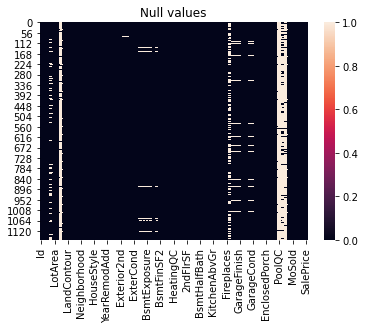

In [6]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

it gives the graphical representation of null values by heatmap
lets from the data it is seen that as the column 'Alley','Fence','MiscFeature','PoolQC'has less data in it so lets we will drop that perticular column

In [7]:
data.drop(['Alley','Fence','MiscFeature','PoolQC'],inplace=True,axis=1)

In [8]:
data.shape

(1168, 77)

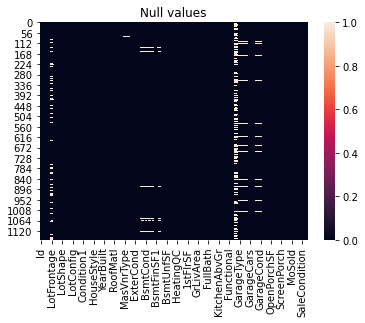

In [9]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

now lets we will replace the null values present in the dataset with the mode

In [11]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mode()[0])
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0])
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])


In [12]:
data.isnull().sum().sum()

0

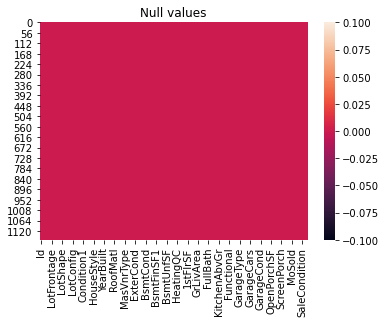

In [13]:
sns.heatmap(data.isnull())
plt.title("Null values")
plt.show()

so now there is no null value present in the dataset
now lets we will encode the data for further analysis with ordinalencoder

# Encoding of dataframe

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
enc=OrdinalEncoder()

In [16]:
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,3.0,60.0,4928,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,2,2007,8.0,4.0,128000
1,889,20,3.0,95.0,15865,1.0,0.0,3.0,0.0,4.0,...,0,0,224,0,0,10,2007,8.0,4.0,268000
2,793,60,3.0,92.0,9920,1.0,0.0,3.0,0.0,1.0,...,0,0,0,0,0,6,2007,8.0,4.0,269790
3,110,20,3.0,105.0,11751,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,1,2010,0.0,4.0,190000
4,422,20,3.0,60.0,16635,1.0,0.0,3.0,0.0,2.0,...,0,0,0,0,0,6,2009,8.0,4.0,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,3.0,60.0,9819,1.0,0.0,3.0,0.0,4.0,...,0,0,0,0,0,2,2010,8.0,4.0,122000
1164,554,20,3.0,67.0,8777,1.0,3.0,3.0,0.0,4.0,...,0,0,0,0,0,5,2009,8.0,4.0,108000
1165,196,160,3.0,24.0,2280,1.0,3.0,3.0,0.0,2.0,...,0,0,0,0,0,7,2009,8.0,4.0,148500
1166,31,70,0.0,50.0,8500,1.0,3.0,3.0,0.0,4.0,...,172,0,0,0,0,7,2008,8.0,4.0,40000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   float64
 3   LotFrontage    1168 non-null   float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   float64
 6   LotShape       1168 non-null   float64
 7   LandContour    1168 non-null   float64
 8   Utilities      1168 non-null   float64
 9   LotConfig      1168 non-null   float64
 10  LandSlope      1168 non-null   float64
 11  Neighborhood   1168 non-null   float64
 12  Condition1     1168 non-null   float64
 13  Condition2     1168 non-null   float64
 14  BldgType       1168 non-null   float64
 15  HouseStyle     1168 non-null   float64
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

In [18]:
data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,68.975171,10484.749144,0.996575,1.938356,2.773973,0.0,3.004281,...,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,22.836520,8957.442311,0.058445,1.412262,0.710027,0.0,1.642667,...,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,360.500000,20.000000,3.000000,60.000000,7621.500000,1.000000,0.000000,3.000000,0.0,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,714.500000,50.000000,3.000000,64.000000,9522.500000,1.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,1079.500000,70.000000,3.000000,79.250000,11515.500000,1.000000,3.000000,3.000000,0.0,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,1460.000000,190.000000,4.000000,313.000000,164660.000000,1.000000,3.000000,3.000000,0.0,4.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


it gives the description about the dataset with its total count ,mean,std,and mini to max values distribution of the respective column

In [19]:
data['EnclosedPorch'].unique()

array([  0, 184, 102, 112,  96, 192, 116, 126, 145,  39, 156, 200, 120,
       286, 244,  68,  80, 216, 137, 234, 272,  44, 105,  24,  70, 114,
        98, 280, 100,  42, 148, 202, 294, 108, 130, 176, 154, 259,  67,
        84, 252, 208, 293, 291, 228, 129, 138, 158, 144, 185, 136, 242,
        40, 224, 264, 128, 177,  56,  34, 189, 268,  99, 150, 205, 301,
       275, 196, 164, 168, 180, 194, 230,  81, 212, 239,  64, 134, 162,
       115, 218,  36, 254,  60,  77, 248, 236, 240, 210,  52, 169, 221,
       220, 318,  30, 160, 123,  90, 170,  50, 386, 190, 552,  91, 174,
        54, 172], dtype=int64)

now we can see from the dataset that some column contains zero values in it from mini to maximum so practically it is not possible such condition so lets we will replace that zeros with the mean of column 

In [20]:
#replacing zero values with mean of column 
data['EnclosedPorch']=data['EnclosedPorch'].replace(0,data['EnclosedPorch'].mean())
data['3SsnPorch']=data['3SsnPorch'].replace(0,data['3SsnPorch'].mean())
data['ScreenPorch']=data['ScreenPorch'].replace(0,data['ScreenPorch'].mean())
data['PoolArea']=data['PoolArea'].replace(0,data['PoolArea'].mean())
data['MiscVal']=data['MiscVal'].replace(0,data['MiscVal'].mean())

In [22]:
data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,3.013699,68.975171,10484.749144,0.996575,1.938356,2.773973,0.0,3.004281,...,42.700681,7.210556,28.878527,6.876592,92.928739,6.344178,2007.804795,7.465753,3.768836,181477.005993
std,416.159877,41.940650,0.633120,22.836520,8957.442311,0.058445,1.412262,0.710027,0.0,1.642667,...,56.141063,28.642472,51.324908,44.633421,539.345706,2.686352,1.329738,1.619459,1.112208,79105.586863
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,23.015411,3.639555,15.051370,3.448630,47.315068,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,360.500000,20.000000,3.000000,60.000000,7621.500000,1.000000,0.000000,3.000000,0.0,2.000000,...,23.015411,3.639555,15.051370,3.448630,47.315068,5.000000,2007.000000,8.000000,4.000000,130375.000000
50%,714.500000,50.000000,3.000000,64.000000,9522.500000,1.000000,3.000000,3.000000,0.0,4.000000,...,23.015411,3.639555,15.051370,3.448630,47.315068,6.000000,2008.000000,8.000000,4.000000,163995.000000
75%,1079.500000,70.000000,3.000000,79.250000,11515.500000,1.000000,3.000000,3.000000,0.0,4.000000,...,23.015411,3.639555,15.051370,3.448630,47.315068,8.000000,2009.000000,8.000000,4.000000,215000.000000
max,1460.000000,190.000000,4.000000,313.000000,164660.000000,1.000000,3.000000,3.000000,0.0,4.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


<AxesSubplot:>

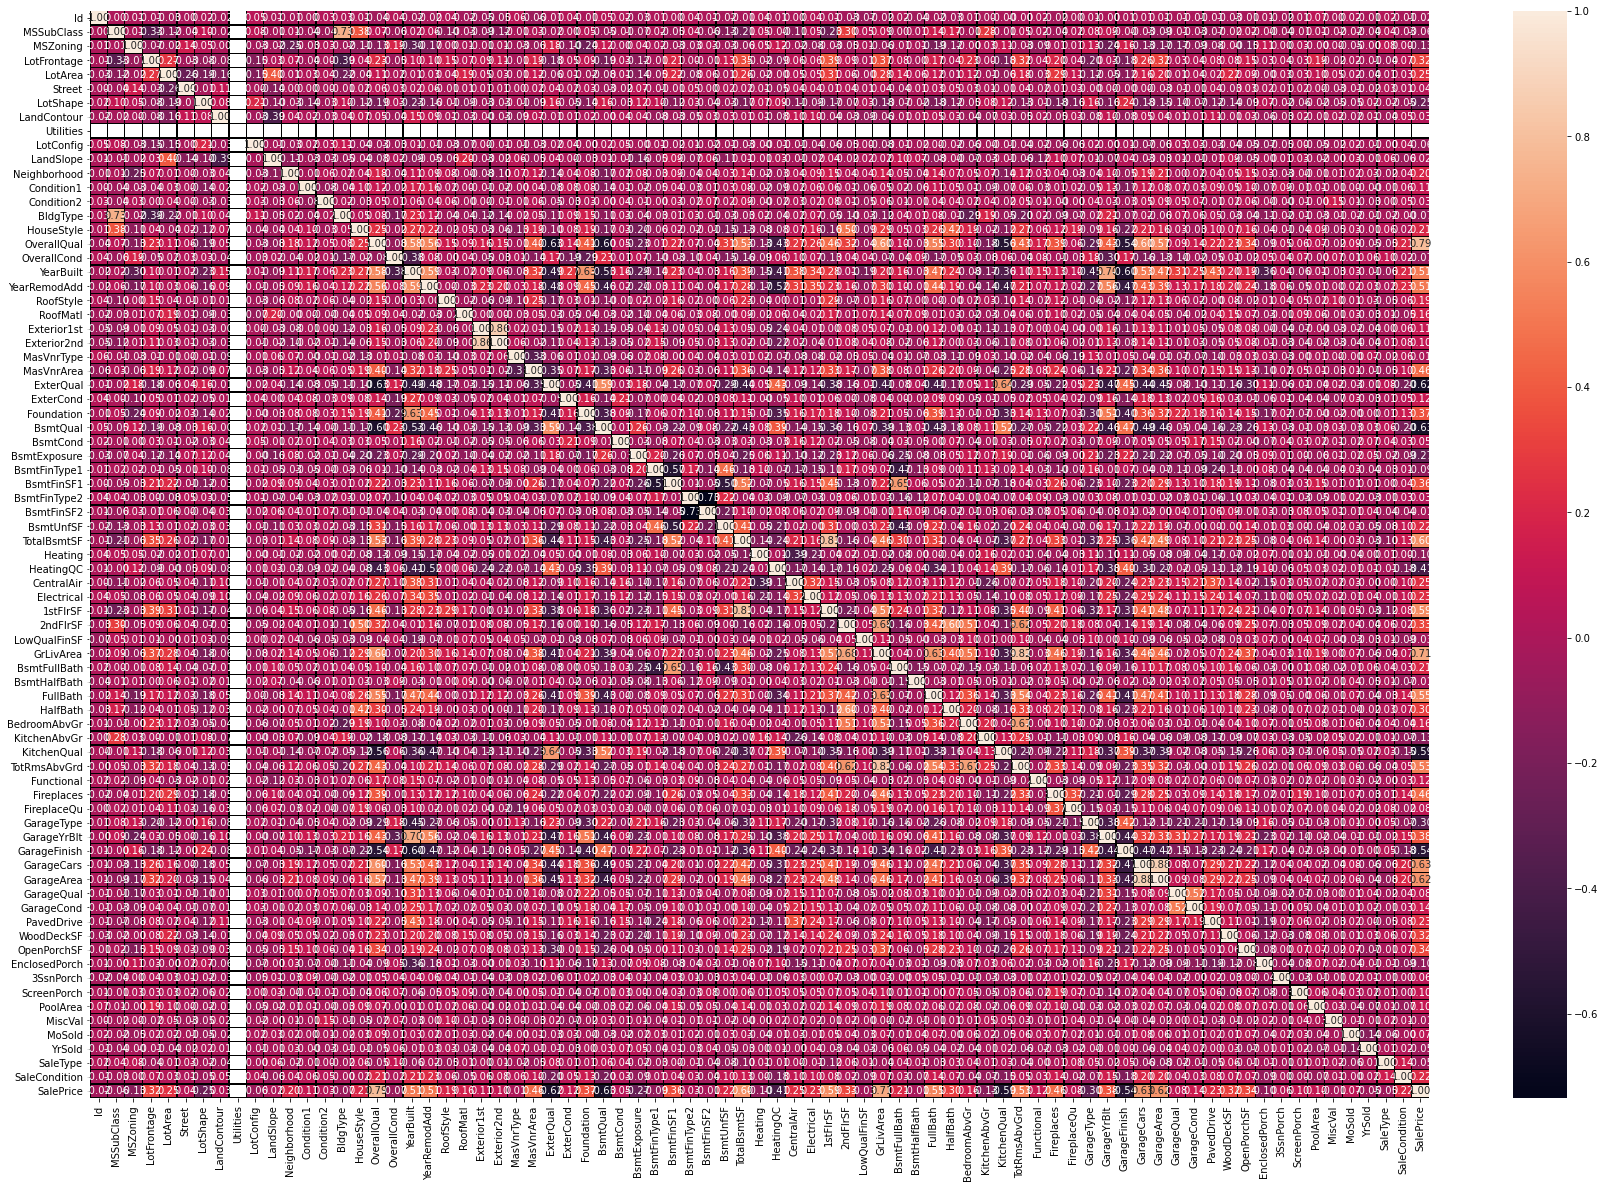

In [23]:
#heat map
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,linewidths=0.2,linecolor='black',fmt='0.2f')

this gives the corelation of target column with the each respective column in %
now we see that the column 'utilities'has no data present in it so lets we will drop that column

In [24]:
data.drop(['Utilities'],inplace=True,axis=1)

In [25]:
data.shape

(1168, 76)

now lets we will check the outliers present in the dataset with help of box plot

Id                  AxesSubplot(0.125,0.840263;0.133621x0.0397368)
MSSubClass       AxesSubplot(0.285345,0.840263;0.133621x0.0397368)
MSZoning          AxesSubplot(0.44569,0.840263;0.133621x0.0397368)
LotFrontage      AxesSubplot(0.606034,0.840263;0.133621x0.0397368)
LotArea          AxesSubplot(0.766379,0.840263;0.133621x0.0397368)
                                       ...                        
MoSold           AxesSubplot(0.285345,0.172684;0.133621x0.0397368)
YrSold            AxesSubplot(0.44569,0.172684;0.133621x0.0397368)
SaleType         AxesSubplot(0.606034,0.172684;0.133621x0.0397368)
SaleCondition    AxesSubplot(0.766379,0.172684;0.133621x0.0397368)
SalePrice              AxesSubplot(0.125,0.125;0.133621x0.0397368)
Length: 76, dtype: object

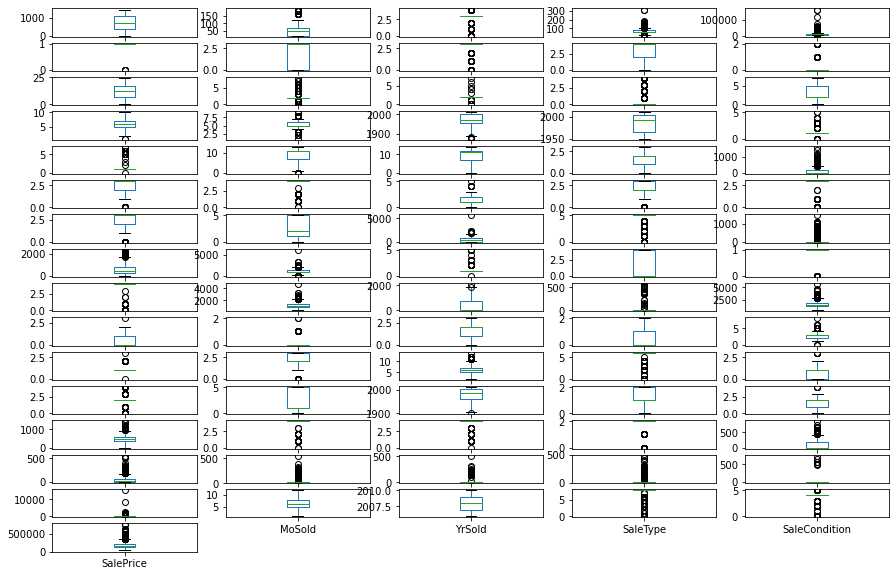

In [26]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(16,5),figsize = (15,10))

data contains some amount of outliers present in it so lets we will remove it by taking the threshold as 3

In [27]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

[[1.43548658 1.50830058 0.02164599 ... 0.33003329 0.20793187 0.67631017]
 [0.39632483 0.87704243 0.02164599 ... 0.33003329 0.20793187 1.09423443]
 [0.16554544 0.07709478 0.02164599 ... 0.33003329 0.20793187 1.11687211]
 ...
 [1.26961389 2.46243779 0.02164599 ... 0.33003329 0.20793187 0.41705186]
 [1.66626597 0.31562908 4.76211672 ... 0.33003329 0.20793187 1.78922393]
 [0.25755011 0.07709478 0.02164599 ... 0.33003329 0.20793187 0.02179027]]


In [28]:
threshold=3
print(np.where(z<3))
print(data.shape)

(array([   0,    0,    0, ..., 1167, 1167, 1167], dtype=int64), array([ 0,  1,  2, ..., 73, 74, 75], dtype=int64))
(1168, 76)


In [29]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new=data[(z<3).all(axis = 1)]

In [30]:
print(data.shape)
print(data_new.shape)
data = data_new
print('Shape after removing outlires',data.shape)

(1168, 76)
(483, 76)
Shape after removing outlires (483, 76)


Id                  AxesSubplot(0.125,0.840263;0.133621x0.0397368)
MSSubClass       AxesSubplot(0.285345,0.840263;0.133621x0.0397368)
MSZoning          AxesSubplot(0.44569,0.840263;0.133621x0.0397368)
LotFrontage      AxesSubplot(0.606034,0.840263;0.133621x0.0397368)
LotArea          AxesSubplot(0.766379,0.840263;0.133621x0.0397368)
                                       ...                        
MoSold           AxesSubplot(0.285345,0.172684;0.133621x0.0397368)
YrSold            AxesSubplot(0.44569,0.172684;0.133621x0.0397368)
SaleType         AxesSubplot(0.606034,0.172684;0.133621x0.0397368)
SaleCondition    AxesSubplot(0.766379,0.172684;0.133621x0.0397368)
SalePrice              AxesSubplot(0.125,0.125;0.133621x0.0397368)
Length: 76, dtype: object

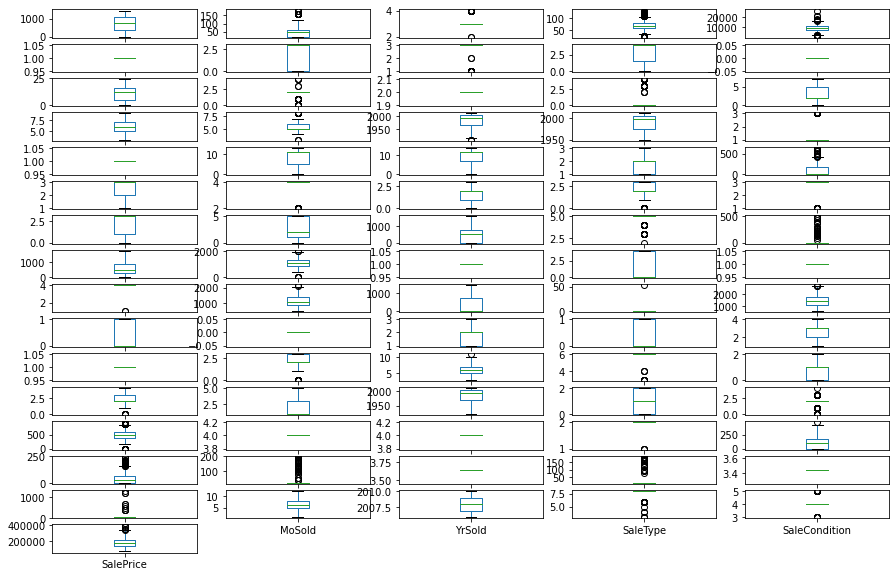

In [31]:
#plotting the boxplot of each column to check the outliers 
data.plot(kind='box',subplots = True,layout=(16,5),figsize = (15,10))

lets we will check the skewness present in the dataset

In [32]:
data.skew()

Id              -0.081971
MSSubClass       1.252783
MSZoning         2.328845
LotFrontage      0.353654
LotArea          0.197913
                   ...   
MoSold           0.270695
YrSold           0.069565
SaleType        -3.196449
SaleCondition    1.591452
SalePrice        0.801238
Length: 76, dtype: float64

In [33]:
#remove skewness
data['MSSubClass']=np.sqrt(data['MSSubClass'])
data['MSZoning']=np.sqrt(data['MSZoning'])
data['SaleCondition']=np.sqrt(data['SaleCondition'])


skewness is removed with the help of sqrt

In [34]:
data.skew()

Id              -0.081971
MSSubClass       0.695875
MSZoning         2.160294
LotFrontage      0.353654
LotArea          0.197913
                   ...   
MoSold           0.270695
YrSold           0.069565
SaleType        -3.196449
SaleCondition    1.321703
SalePrice        0.801238
Length: 76, dtype: float64

In [41]:
data.shape

(483, 76)

we can also plot the histogram to check the distribution of data

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'MSZoning'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>],
       [<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'Street'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'LandContour'}>],
       [<AxesSubplot:title={'center':'LotConfig'}>,
        <AxesSubplot:title={'center':'LandSlope'}>,
        <AxesSubplot:title={'center':'Neighborhood'}>,
        <AxesSubplot:title={'center':'Condition1'}>],
       [<AxesSubplot:title={'center':'Condition2'}>,
        <AxesSubplot:title={'center':'BldgType'}>,
        <AxesSubplot:title={'center':'HouseStyle'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
     

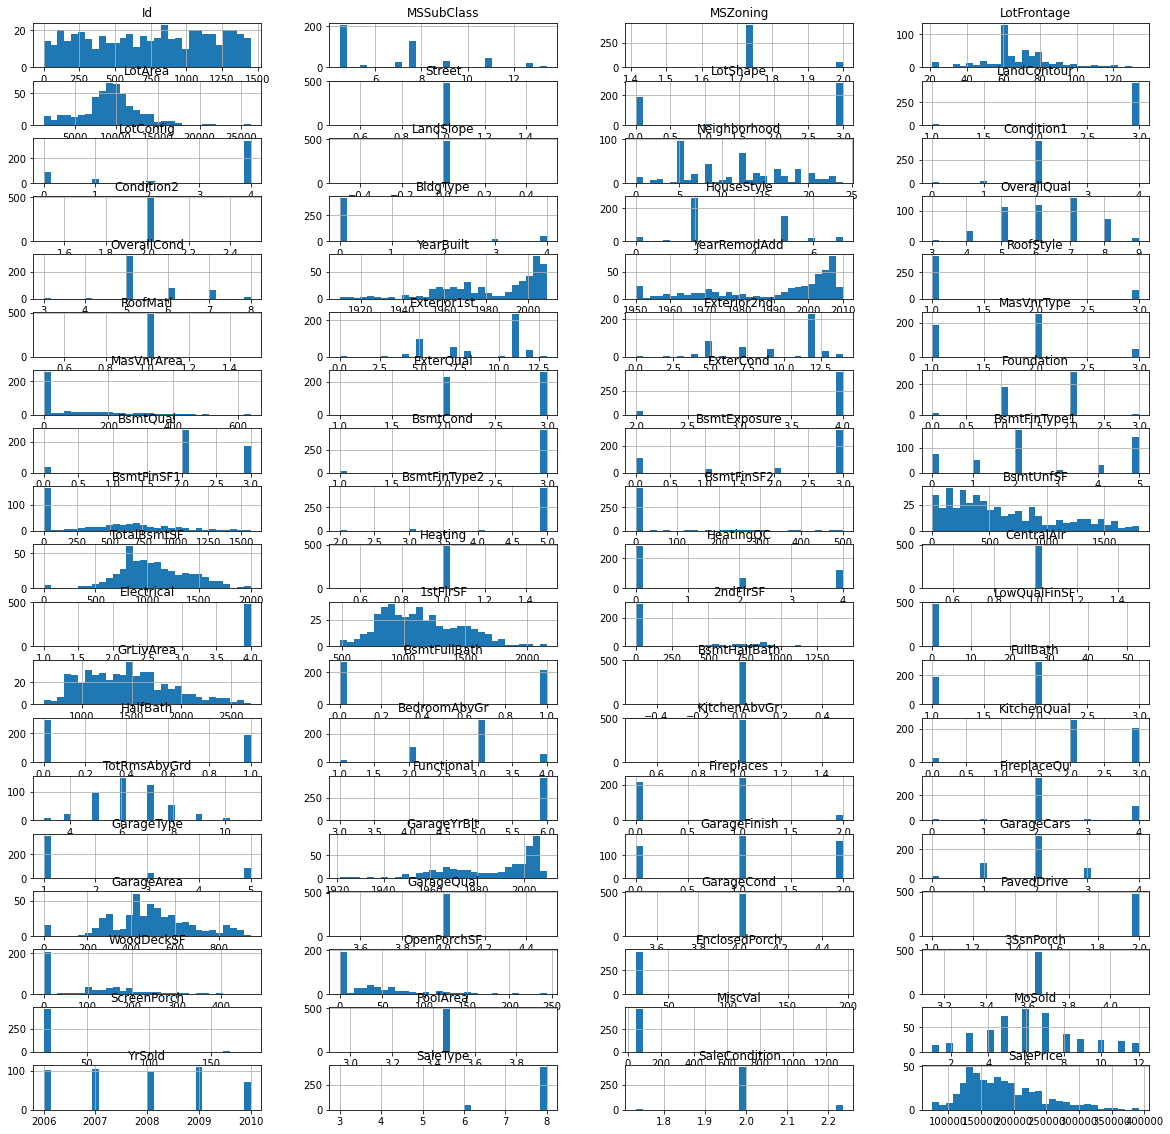

In [45]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (19,4), bins = 30)

we can also plot scatter plot to show the relation of target column with the respective column

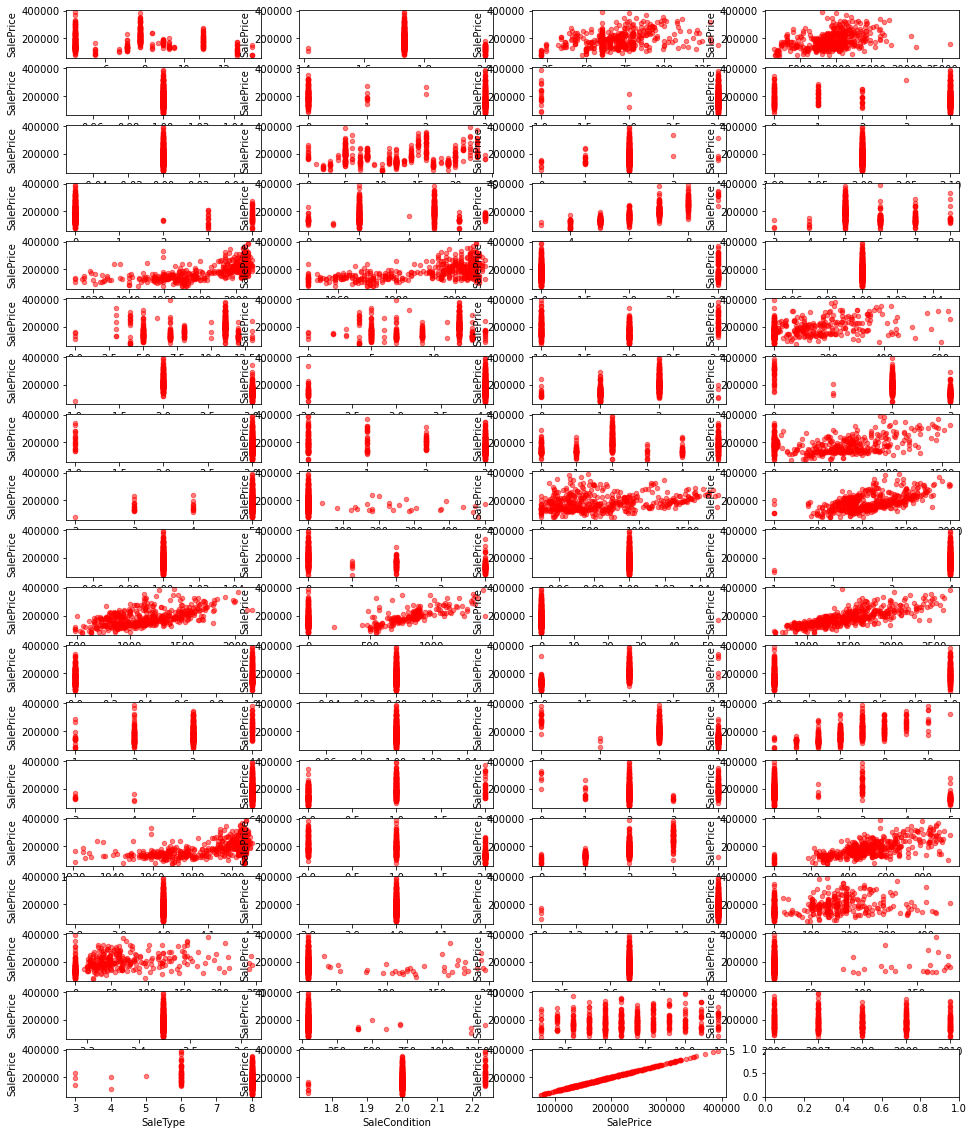

In [46]:
# setup figure
fig, axes = plt.subplots(nrows=19, ncols=4, figsize=(16, 20))

# iterate and plot subplots
for xcol, ax in zip(data.columns[1:], [x for v in axes for x in v]):
    data.plot.scatter(x=xcol, y='SalePrice', ax=ax, alpha=0.5, color='r')


it shows the linear corelation with the target column

In [39]:
import warnings
warnings.filterwarnings('ignore')

LinAlgError: singular matrix

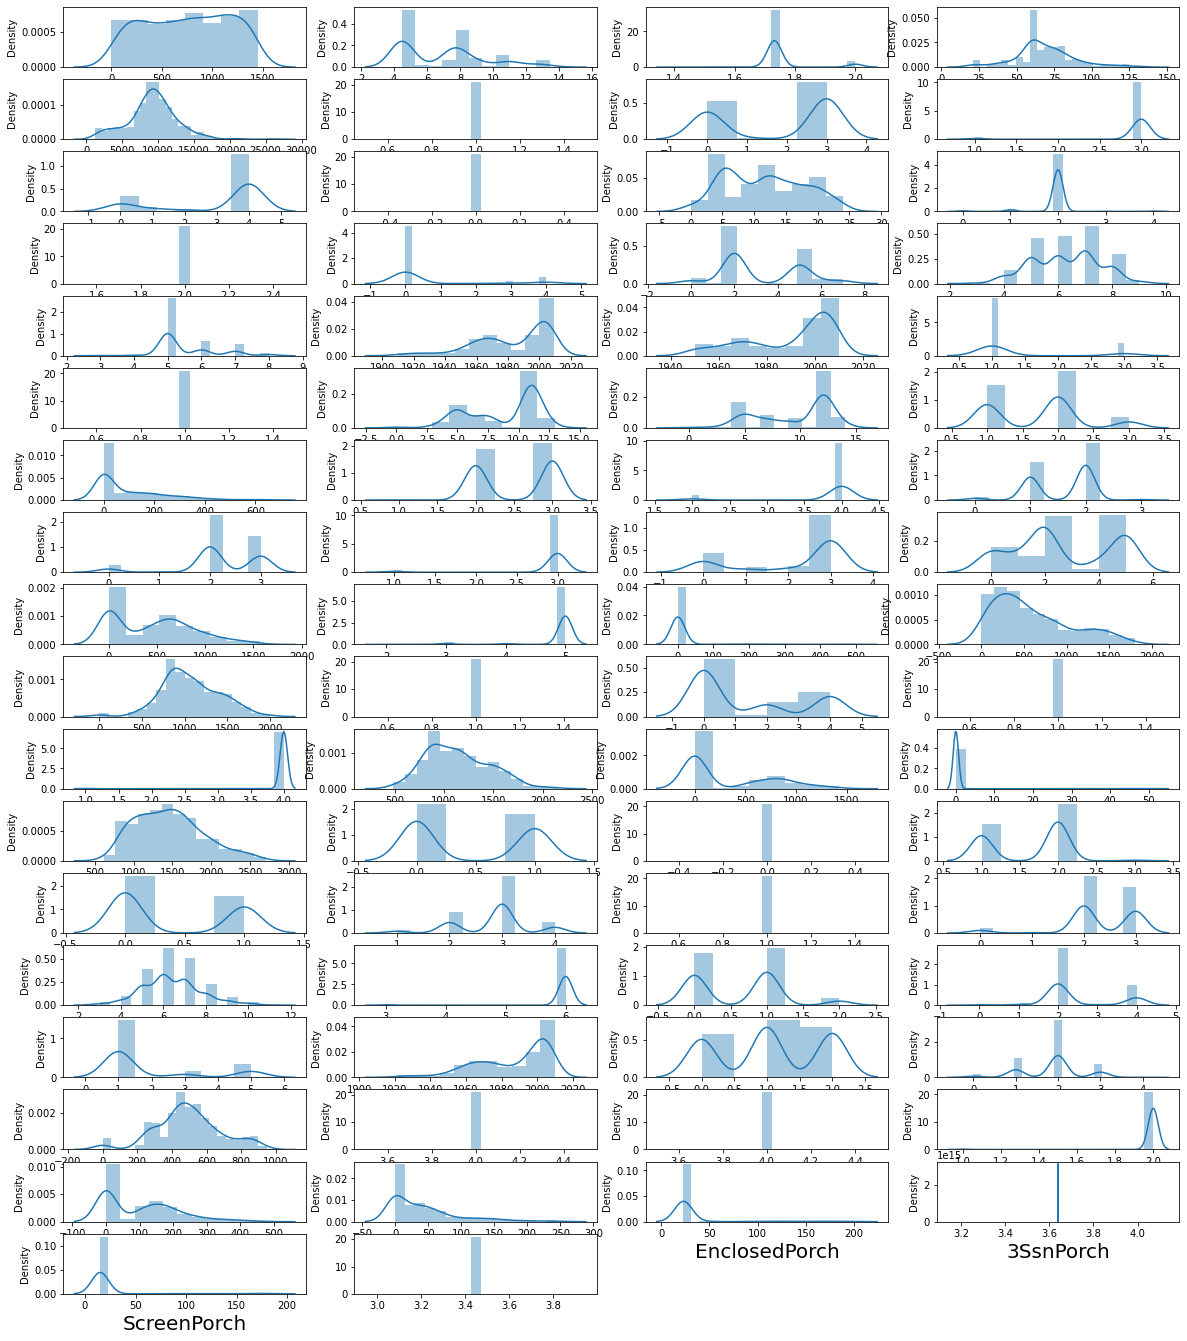

In [47]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=76:
        ax=plt.subplot(19,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    

In [48]:
#import the necessary libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

In [49]:
#devide data set into feature and label
y=data['SalePrice']
x=data.drop(['SalePrice'],axis=1)

In [50]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [51]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [52]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)
        

R2 score correspond to random state  40 is 0.7496481826113385
R2 score correspond to random state  40 is 0.6414011320892585
R2 score correspond to random state  40 is 0.8524242382218268
R2 score correspond to random state  40 is 0.9063119527142071
R2 score correspond to random state  40 is 0.8795479821501994
R2 score correspond to random state  41 is 0.7234707600632584
R2 score correspond to random state  41 is 0.5527187788147323
R2 score correspond to random state  41 is 0.7827957140957278
R2 score correspond to random state  41 is 0.8493767009615828
R2 score correspond to random state  41 is 0.8162555184351312
R2 score correspond to random state  42 is 0.5857637189209309
R2 score correspond to random state  42 is 0.6271222728615629
R2 score correspond to random state  42 is 0.8406354233787425
R2 score correspond to random state  42 is 0.8753967350555067
R2 score correspond to random state  42 is 0.8696373738219063
R2 score correspond to random state  43 is 0.6625534754567927
R2 score

we got the max accuracy of 93.16% for random state of 54 for linearRegression() model 

In [53]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[-1.47566004,  1.60994975, -0.30444604, ..., -0.6438789 ,
         0.34434491, -0.26550955],
       [ 0.1022656 ,  0.3370705 , -0.30444604, ..., -0.6438789 ,
         0.34434491, -0.26550955],
       [ 1.05944572,  0.3370705 , -0.30444604, ..., -1.37735416,
        -2.25438305,  2.64544615],
       ...,
       [-1.09184029, -0.96173312, -0.30444604, ...,  1.55654687,
         0.34434491, -0.26550955],
       [-1.31218126,  2.28225998, -0.30444604, ...,  0.82307161,
         0.34434491, -0.26550955],
       [-0.31472376,  0.3370705 , -0.30444604, ..., -1.37735416,
         0.34434491, -0.26550955]])

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=54)

In [55]:
LR=LinearRegression()

In [56]:
LR.fit(x_train,y_train)

LinearRegression()

In [57]:
pred_test=LR.predict(x_test)
print(r2_score(y_test,pred_test))

0.931635696708535


# cross validation

lets we cross validate the model

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
for i in range(2,10):
    cv=cross_val_score(LR,x,y,cv=i)
    print(LR,cv.mean())


LinearRegression() 0.8628243566669234
LinearRegression() 0.8692496763516032
LinearRegression() 0.8828764329914502
LinearRegression() 0.882516350569962
LinearRegression() 0.8827051185023134
LinearRegression() 0.8843870533554382
LinearRegression() 0.8888786586863904
LinearRegression() 0.8875926771510733


In [60]:
#lets plot and visualize
y_pred=LR.predict(x_test)
y_pred

array([250815.73957204, 302498.86457204, 236494.05207204,  70097.14582204,
       203041.42707204, 234370.81769704, 210742.61457204, 185023.30207204,
       256149.67707204, 139270.42707204, 212744.36457204, 198734.61457204,
       164714.80207204, 221686.23957204, 251382.80207204,  85740.72394704,
       233098.98957204, 248406.55207204, 168623.55207204, 151425.05207204,
       220492.19269704, 124125.92707204, 286774.05207204, 239746.09894704,
       185802.23957204,  44621.11457204, 185926.23957204, 139654.55207204,
       195235.36847829, 291916.80207204, 249106.80207204, 224887.05207204,
       176779.42707204, 181341.92707204, 191617.22394704, 192480.36457204,
       255404.92707204, 214085.92707204,  80692.64582204, 137372.80207204,
       209909.67707204, 234084.17707204, 179023.17707204, 194789.48957204,
       315177.11457204, 331576.17707204, 227643.17707204, 224755.14582204,
       128647.98957204, 274451.48957204, 214025.25519704, 195524.98957204,
       283881.92707204, 2

it gives the predicted result for given test data
we can also plot the scatter plot to show the actual VS model prediction plot

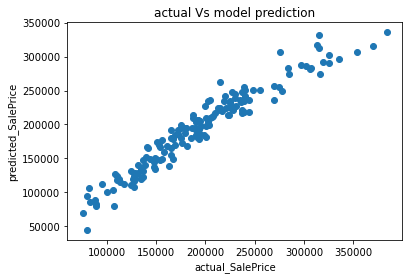

In [61]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual_SalePrice')
plt.ylabel('predicted_SalePrice')
plt.title('actual Vs model prediction')
plt.show()

it show that actual and predicted values are close to each other

# Regularization

In [62]:
#import the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')

In [63]:
parameters={'alpha':[.0001,0.001,.01,.1,1,10],'random_state':list(range(0,30))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [64]:
from sklearn.metrics import r2_score

In [65]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.9315050179836585

In [66]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8831873103999553

# Ensemble technique

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [70]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)                         

R2score: 87.35709533580102
cross val score: 87.00056349488807


lets we will save best fit model 

# Saving Model

In [71]:
#saving model
import joblib
joblib.dump(LR,'Housing_Project')

['Housing_Project']

# conclusion

In [72]:
loaded_model=joblib.load('Housing_Project')
result=loaded_model.score(x_test,y_test)
print(result)

0.931635696708535


so in this way we have devoloped the model,saved it and also drawn a result from the devoloped model
now lets we will draw the result from the given test data which is provided to us

In [73]:
testdata=pd.read_excel("C:\\Users\\SAI BABA\\Desktop\\test.xlsx")
testdata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [75]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

data contains total 292 rows and 80 columns,some of them contain null values in it so lets we fill that values with the mode function

In [76]:
testdata['LotFrontage']=testdata['LotFrontage'].fillna(testdata['LotFrontage'].mode()[0])
testdata['MasVnrType']=testdata['MasVnrType'].fillna(testdata['MasVnrType'].mode()[0])
testdata['MasVnrArea']=testdata['MasVnrArea'].fillna(testdata['MasVnrArea'].mode()[0])
testdata['BsmtQual']=testdata['BsmtQual'].fillna(testdata['BsmtQual'].mode()[0])
testdata['BsmtCond']=testdata['BsmtCond'].fillna(testdata['BsmtCond'].mode()[0])
testdata['BsmtExposure']=testdata['BsmtExposure'].fillna(testdata['BsmtExposure'].mode()[0])
testdata['BsmtFinType1']=testdata['BsmtFinType1'].fillna(testdata['BsmtFinType1'].mode()[0])
testdata['BsmtFinType2']=testdata['BsmtFinType2'].fillna(testdata['BsmtFinType2'].mode()[0])
testdata['FireplaceQu']=testdata['FireplaceQu'].fillna(testdata['FireplaceQu'].mode()[0])
testdata['GarageType']=testdata['GarageType'].fillna(testdata['GarageType'].mode()[0])
testdata['GarageYrBlt']=testdata['GarageYrBlt'].fillna(testdata['GarageYrBlt'].mode()[0])
testdata['GarageFinish']=testdata['GarageFinish'].fillna(testdata['GarageFinish'].mode()[0])
testdata['GarageQual']=testdata['GarageQual'].fillna(testdata['GarageQual'].mode()[0])
testdata['GarageCond']=testdata['GarageCond'].fillna(testdata['GarageCond'].mode()[0])
testdata['Electrical']=testdata['Electrical'].fillna(testdata['Electrical'].mode()[0])

In [77]:
testdata.isnull().sum().sum()

1100

In [78]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    292 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [79]:
testdata.drop(['Alley','PoolQC','Fence','MiscFeature'],inplace=True,axis=1)

# Encoding of dataframe

In [80]:
from sklearn.preprocessing import OrdinalEncoder

In [81]:
enc=OrdinalEncoder()

In [82]:
for i in testdata.columns:
    if testdata[i].dtype=="object":
        testdata[i]=enc.fit_transform(testdata[i].values.reshape(-1,1))
testdata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,2.0,86.0,14157,1.0,0.0,1.0,0.0,0.0,...,51,0,0,0,0,0,7,2007,5.0,2.0
1,1018,120,2.0,60.0,5814,1.0,0.0,3.0,0.0,1.0,...,0,0,0,0,0,0,8,2009,0.0,0.0
2,929,20,2.0,60.0,11838,1.0,3.0,3.0,0.0,4.0,...,151,0,0,0,0,0,6,2009,5.0,2.0
3,1148,70,2.0,75.0,12000,1.0,3.0,0.0,0.0,4.0,...,0,0,0,0,0,0,7,2009,5.0,2.0
4,1227,60,2.0,86.0,14598,1.0,0.0,3.0,0.0,1.0,...,18,0,0,0,0,0,1,2008,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,2.0,78.0,10206,1.0,3.0,3.0,0.0,4.0,...,99,0,0,0,0,0,10,2008,5.0,2.0
288,1048,20,2.0,57.0,9245,1.0,1.0,3.0,0.0,4.0,...,0,0,0,0,0,0,2,2008,5.0,2.0
289,17,20,2.0,60.0,11241,1.0,0.0,3.0,0.0,1.0,...,0,0,0,0,0,700,3,2010,5.0,2.0
290,523,50,3.0,50.0,5000,1.0,3.0,3.0,0.0,0.0,...,24,36,0,0,0,0,10,2006,5.0,2.0


In [83]:
testdata.drop(['Utilities'],inplace=True,axis=1)

In [84]:
#load the saved model
SalePrice=joblib.load('Housing_Project')
prices=SalePrice.predict(testdata)
prices

array([ 2.40684140e+17,  1.54870399e+17,  2.55984028e+17,  1.04926247e+17,
        1.30804757e+17, -4.20157284e+16,  9.72904146e+16,  2.05595197e+17,
        1.82586559e+17,  1.48635200e+17,  7.63266945e+16,  5.81861266e+16,
        1.43521601e+17,  1.92024808e+17,  2.82417992e+17,  2.29160551e+16,
        1.02363243e+17,  6.46495873e+16,  8.92076214e+16,  8.42170754e+16,
        8.83140721e+16,  1.36410009e+17,  1.55198937e+17,  2.55922172e+16,
        1.01627684e+17,  1.10602767e+17,  1.39003866e+17,  1.67627328e+17,
        9.15913984e+16,  1.50681175e+17,  8.64225897e+16,  1.47132958e+17,
        2.66890948e+17,  1.70529148e+17,  1.13258465e+17,  8.20598791e+16,
        1.11614285e+17,  8.54951591e+16,  8.88233867e+16,  1.15462672e+17,
        6.76281503e+16,  1.84426461e+17,  1.23891958e+17,  1.64744765e+17,
        1.20327434e+17,  1.20902919e+17,  1.39876340e+17,  1.04436504e+17,
        1.63356737e+17,  2.08837221e+17,  2.18459296e+16,  1.80065379e+17,
        1.09411726e+17,  

In [85]:
#lets plot and visualize
y_pred=LR.predict(testdata)
y_pred

array([ 2.40684140e+17,  1.54870399e+17,  2.55984028e+17,  1.04926247e+17,
        1.30804757e+17, -4.20157284e+16,  9.72904146e+16,  2.05595197e+17,
        1.82586559e+17,  1.48635200e+17,  7.63266945e+16,  5.81861266e+16,
        1.43521601e+17,  1.92024808e+17,  2.82417992e+17,  2.29160551e+16,
        1.02363243e+17,  6.46495873e+16,  8.92076214e+16,  8.42170754e+16,
        8.83140721e+16,  1.36410009e+17,  1.55198937e+17,  2.55922172e+16,
        1.01627684e+17,  1.10602767e+17,  1.39003866e+17,  1.67627328e+17,
        9.15913984e+16,  1.50681175e+17,  8.64225897e+16,  1.47132958e+17,
        2.66890948e+17,  1.70529148e+17,  1.13258465e+17,  8.20598791e+16,
        1.11614285e+17,  8.54951591e+16,  8.88233867e+16,  1.15462672e+17,
        6.76281503e+16,  1.84426461e+17,  1.23891958e+17,  1.64744765e+17,
        1.20327434e+17,  1.20902919e+17,  1.39876340e+17,  1.04436504e+17,
        1.63356737e+17,  2.08837221e+17,  2.18459296e+16,  1.80065379e+17,
        1.09411726e+17,  